# <div style="text-align: center">Random Forests - Hohenberg-Kohn Mapping - Solid-State</div> 
 
## <div style="text-align: center">Jon Vandermause, Steven Torrisi, Simon Batzner</div> 

## <div style="text-align: center">Positions-to-Density</div> 

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from KRR_reproduce import *

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [21]:
# setup
ev2kcal = 1/0.043       # conversion factor
SEED = 42
SIM_NO = 201            # total number of data points
M = 180                 # number of training points

# random forest
N_ESTIMATORS = 100      # number of treest
MAX_DEPTH = 20          # maximum depth of trees

# alternate params
# N_ESTIMATORS = 5000   # number of treest
# MAX_DEPTH = 200       # maximum depth of trees

# path to data
os.environ['PROJDIR'] = '/Users/simonbatzner1/Desktop/Research/Research_Code/ML-electron-density'
STR_PREF = os.environ['PROJDIR']+'/Aluminium_Dataset/Store/'

print("Number of estimators: {}".format(N_ESTIMATORS))
print("Maximum depth: {}".format(MAX_DEPTH))

Number of estimators: 100
Maximum depth: 20


## Load data

In [22]:
pos = []
ens = []
fours = []

for n in range(SIM_NO):
    # load arrays
    en_curr = np.reshape(np.load(STR_PREF+'en_store/energy'+str(n)+'.npy'),(1))[0]
    pos_curr = np.load(STR_PREF+'pos_store/pos'+str(n)+'.npy')
    four_curr = np.load(STR_PREF+'four_store/four'+str(n)+'.npy')
    
    # store arrays
    ens.append(en_curr)
    pos_curr = pos_curr.flatten()
    pos.append(pos_curr)
    fours.append(four_curr)

# convert to np arrays
ens = np.array(ens)
pos = np.array(pos)
fours = np.array(fours)

In [23]:
fours_flattened = []

for n in range(SIM_NO):
    four = fours[n]
    four = four.flatten()
    four= np.absolute(four)
    fours_flattened.append(four)
    
data = pos
labels = fours_flattened

# define training and test indices
train_indices = [int(n) for n in np.round(np.linspace(0,200,M))]
test_indices = [n for n in range(201) if n not in train_indices]

if len(train_indices) != M: 
    print("Size of training set doesn't match the M specified")
    
x_train = np.array([data[n] for n in train_indices])
x_test = np.array([data[n] for n in test_indices])
y_train = np.array([labels[n] for n in train_indices])
y_test =np.array([labels[n] for n in test_indices])

# convert to np arrays
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(180, 12)
(21, 12)
(21, 15625)


In [24]:
# train random forest
estimator = RandomForestRegressor(random_state=0, n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH)
print("Training...\n")
estimator.fit(x_train, y_train)

Training...



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [25]:
# eval on training data
y_true_train, y_pred_train = y_train, estimator.predict(x_train)

# eval on test data
y_true, y_pred = y_test, estimator.predict(x_test)

print("Number of estimators: {}".format(N_ESTIMATORS))
print("Maximum depth: {}".format(MAX_DEPTH))
print("\nMAE on training data:\t{}".format(mean_absolute_error(y_true_train, y_pred_train)))
print("MAE on test data:\t{}".format(mean_absolute_error(y_true, y_pred)))

print("\nPredicted Fourier components:\n")
print(y_pred)

y_pot2four_pred = y_pred

Number of estimators: 100
Maximum depth: 20

MAE on training data:	0.006696506802165186
MAE on test data:	0.018634944123746337

Predicted Fourier components:

[[  2.35109738e+03   2.97132699e+01   1.08142179e+02 ...,   8.03936003e-05
    6.99161455e-05   7.00993014e-05]
 [  2.35109734e+03   2.61134517e+01   1.08314067e+02 ...,   9.34741646e-05
    7.04610200e-05   8.00031358e-05]
 [  2.35109735e+03   4.12193130e+01   1.08105937e+02 ...,   6.99260618e-05
    6.48335491e-05   8.36064556e-05]
 ..., 
 [  2.35109733e+03   6.57618871e+01   1.10349979e+02 ...,   7.47492427e-05
    7.14842453e-05   5.70732483e-05]
 [  2.35109737e+03   4.34083717e+01   1.08172784e+02 ...,   6.50459882e-05
    1.08919019e-04   6.88154975e-05]
 [  2.35109730e+03   4.77000431e+01   1.06443048e+02 ...,   7.06690720e-05
    8.36699107e-05   7.32724585e-05]]


## <div style="text-align: center">Density-to-Energy </div> 

In [35]:
# setup
ev2kcal = 1/0.043     # conversion factor
SEED = 42
SIM_NO = 201          # total number of data points
M = 180               # number of training points

# random forest
N_ESTIMATORS = 100   # number of treest
MAX_DEPTH = 20      # maximum depth of trees

# path to data
os.environ['PROJDIR'] = '/Users/simonbatzner1/Desktop/Research/Research_Code/ML-electron-density'
STR_PREF = os.environ['PROJDIR']+'/Aluminium_Dataset/Store/'

print("Number of estimators: {}".format(N_ESTIMATORS))
print("Maximum depth: {}".format(MAX_DEPTH))

Number of estimators: 100
Maximum depth: 20


In [36]:
data = fours_flattened
labels = ens

# define training and test indices
train_indices = [int(n) for n in np.round(np.linspace(0,200,M))]
test_indices = [n for n in range(201) if n not in train_indices]

if len(train_indices) != M: 
    print("Size of training set doesn't match the M specified")
    
x_train = np.array([data[n] for n in train_indices])
x_test = np.array([data[n] for n in test_indices])
y_train = np.array([labels[n] for n in train_indices])
y_test =np.array([labels[n] for n in test_indices])

# convert to np arrays
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(180, 15625)
(21, 15625)
(21,)


## Set up training and test data

In [37]:
# train random forest
estimator = RandomForestRegressor(random_state=0, n_estimators=N_ESTIMATORS, max_depth=MAX_DEPTH)
print("Training...\n")
estimator.fit(x_train, y_train)

Training...



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [40]:
# eval on training data
y_true_train, y_pred_train = y_train, estimator.predict(x_train)

# eval on test data
y_true, y_pred = y_test, estimator.predict(x_test)

print("Number of estimators: {}".format(N_ESTIMATORS))
print("Maximum depth: {}".format(MAX_DEPTH))
print("\nMAE on training data in:\t{}".format(mean_absolute_error(y_true_train, y_pred_train)))
print("MAE on test data in:\t\t{}".format(mean_absolute_error(y_true, y_pred)))

print("\nPredicted Energy:\n")
y_pred[0]

Number of estimators: 100
Maximum depth: 20

MAE on training data in:	0.010673150935845557
MAE on test data in:		0.03733083519092128

Predicted Energy:



-227.82100737469463

## Now let's compare to generated data from the first mapping

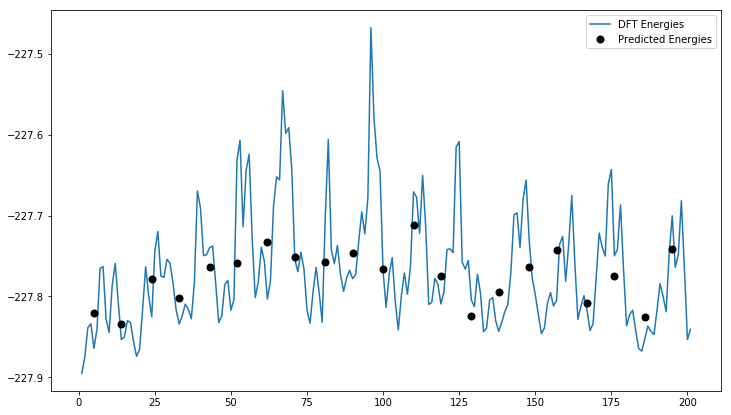

In [41]:
fig = plt.figure(figsize=(12, 7)); 
plt.plot(np.linspace(1, SIM_NO, SIM_NO), ens, label = 'DFT Energies'); 
plt.plot(test_indices, y_pred, 'k.', MarkerSize = 10, mew = 3, label = 'Predicted Energies'); 
plt.legend(); 
plt.show(); 



[1] Brockherde et al. Bypassing the Kohn-Sham equations with machine learning. Nature Communications 8, 872 (2017)